In [99]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


In [101]:
full_data = np.load('machine_learning_data.npy')
np.random.shuffle(full_data)

In [102]:
X_data = full_data[:,:-5]
y_data = full_data[:,-5:]
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X_data= sc.fit_transform(X_data)
y_data= y_data.reshape(-1,5)
y_data=sc.fit_transform(y_data)

In [103]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [105]:
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

In [106]:
model = Sequential()
model.add(Dense(128, input_dim=in_dim, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")

In [107]:
def build_model(in_dim,out_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=in_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(out_dim)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [108]:
mod = build_model(in_dim,out_dim)
mod.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 325       
Total params: 32,901
Trainable params: 32,901
Non-trainable params: 0
_________________________________________________________________


In [109]:
#y_rf = pd.DataFrame(y_rf)

#y_test.reset_index(drop=True, inplace=True)
#y_rf.reset_index(drop=True, inplace=True)


In [111]:
history = mod.fit(X_train, y_train, epochs=2500,batch_size = 512,validation_split=0.2, verbose=0)

In [112]:
#pd.concat([y_test,y_rf] ,axis = 1)

In [113]:
y_pred = mod.predict(X_test)


In [114]:
ypred = pd.DataFrame(y_pred)
ytest = pd.DataFrame(y_test)

In [115]:
print("y1 MSE:%.4f" % mean_squared_error(ytest.iloc[:,0], y_pred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest.iloc[:,1], y_pred[:,1]))
print("y3 MSE:%.4f" % mean_squared_error(ytest.iloc[:,2], y_pred[:,2])) 
print("y4 MSE:%.4f" % mean_squared_error(ytest.iloc[:,3], y_pred[:,3]))
print("y5 MSE:%.4f" % mean_squared_error(ytest.iloc[:,4], y_pred[:,4])) 

y1 MSE:0.0070
y2 MSE:0.0504
y3 MSE:0.0154
y4 MSE:0.0875
y5 MSE:0.0047


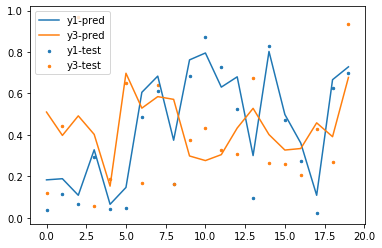

In [116]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:20], ytest.iloc[:20,0],  s=6, label="y1-test")
plt.plot(x_ax[:20], ypred.iloc[:20,0], label="y1-pred")
plt.scatter(x_ax[:20], ytest.iloc[:20,1],  s=6, label="y3-test")
plt.plot(x_ax[:20], ypred.iloc[:20,1], label="y3-pred")
plt.legend()
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])


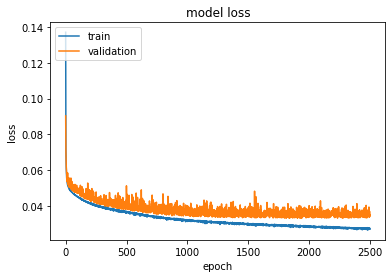

In [120]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

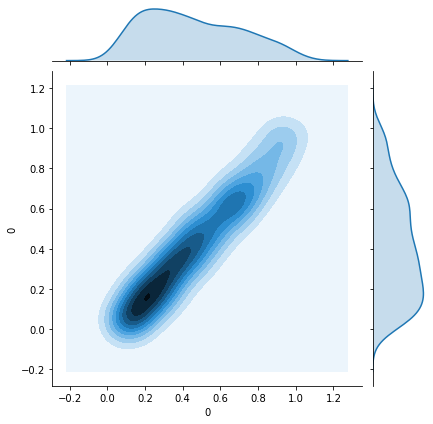

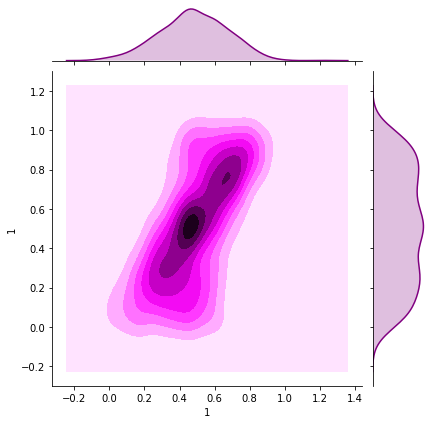

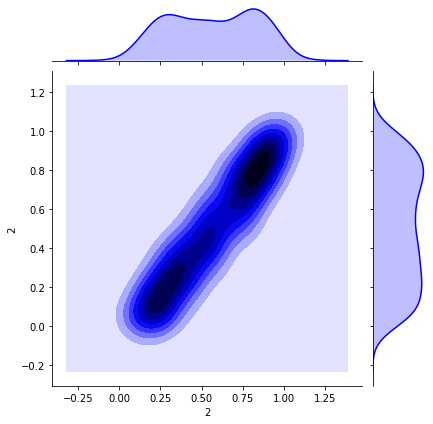

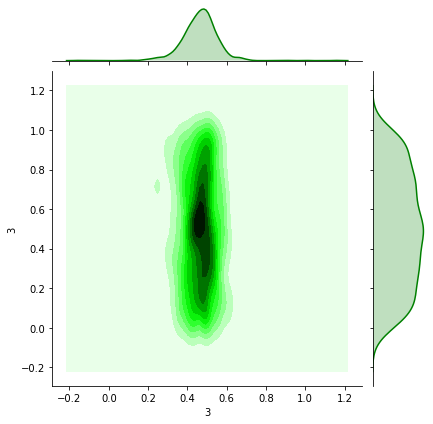

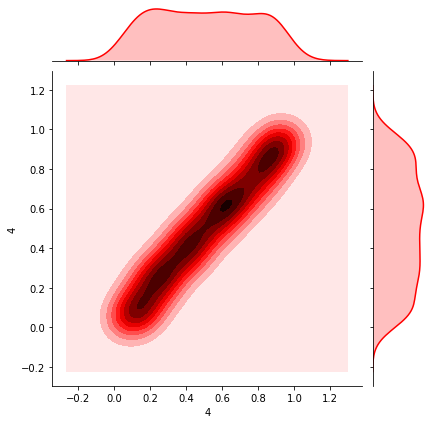

In [118]:
plot_corr(ypred,ytest)

In [121]:
ytest.reset_index(drop=True, inplace=True)
ypred.reset_index(drop=True, inplace=True)
pd.concat([ytest,ypred] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,0.037938,0.120769,0.388931,0.716873,0.493704,0.183284,0.510436,0.577620,0.497968,0.650619
1,0.112667,0.441643,0.445937,0.300748,0.277367,0.188804,0.397744,0.571619,0.406192,0.221614
2,0.068120,0.967466,0.248555,0.733659,0.964694,0.108930,0.492061,0.284796,0.468924,0.966790
3,0.293352,0.055517,0.302236,0.215699,0.588926,0.328303,0.402682,0.331904,0.421316,0.576892
4,0.044627,0.187002,0.958735,0.342727,0.091207,0.065293,0.153030,0.969680,0.665252,0.113021
...,...,...,...,...,...,...,...,...,...,...
995,0.096681,0.813483,0.160894,0.874632,0.509081,0.232622,0.750933,0.393615,0.391120,0.532508
996,0.368325,0.063253,0.830251,0.659393,0.336618,0.375574,-0.003858,0.882506,0.519184,0.374276
997,0.463700,0.404914,0.105439,0.521489,0.403149,0.720699,0.270012,0.470520,0.434556,0.416402
998,0.541586,0.814673,0.788282,0.020293,0.266992,0.579980,0.552079,0.877703,0.359861,0.195636


In [19]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

NameError: name 'y_rf' is not defined

In [ ]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

In [ ]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')